# LetsGrowMore Internship: Data Science
# Intermediate level - Task 2: Exploratory Data Analysis on Dataset Terrorism
*submitted by* **FARAZ**


---
Description

As a security/defense analyst, try to find out the hot zone of terrorism.



# Import all Libraries

In [ ]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from google.colab import files
import matplotlib.pyplot as plt

%matplotlib inline

# Read the Dataset 


In [ ]:
data = pd.read_csv("globalterrorismdb_0718dist.csv" ,encoding='iso-8859-1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
data.shape

(2909, 135)

In [ ]:
data.rename(columns={'eventid':'Event_ID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state'
                             ,'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                             'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                             'motive':'Motive','success':'Success'},inplace=True)
data

,Event_ID,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,state,city,latitude,longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,Success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,...,weapsubtype4,weapsubtype4_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,197503270005,1975,3,27,NaN,0,NaN,185,Spain,8,Western Europe,Biscay,Bilbao,43.258434,-2.921819,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,80.0,Memorial/Cemetery/Monument,NaN,monument,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,0.0,1.0,NaN
2905,197503270006,1975,3,27,NaN,0,NaN,185,Spain,8,Western Europe,Gipuzcoa,Legazpi,43.054361,-2.333641,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,Business,7.0,Retail/Grocery/Bakery,NaN,telephone company,...,NaN,NaN,Explosive,NaN,NaN,0.0,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
data.isnull().sum()

Event_ID         0
Year             0
Month            0
Day              0
approxdate    2893
              ... 
INT_LOG          1
INT_IDEO         1
INT_MISC         1
INT_ANY          1
related       2649
Length: 135, dtype: int64

In [ ]:
dup = data[data.duplicated()]
print(dup)

Empty DataFrame
Columns: [Event_ID, Year, Month, Day, approxdate, extended, resolution, country, Country, region, Region, state, city, latitude, longitude, specificity, vicinity, location, Summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, Success, suicide, attacktype1, AttackType, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, Target_type, targsubtype1, targsubtype1_txt, corp1, Target, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, Group, gsubname, gname2, gsubname2, gname3, gsubname3, Motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, Weapon_type, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtyp

In [ ]:
data = data[['Event_ID','Year','Month','Day','Country','Region','region','state','latitude','longitude','Success','AttackType','attacktype1'
               ,'Target_type','targtype1','Target','natlty1_txt','Killed','Wounded','Motive','city','Weapon_type','Group']]
data

,Event_ID,Year,Month,Day,Country,Region,region,state,latitude,longitude,Success,AttackType,attacktype1,Target_type,targtype1,Target,natlty1_txt,Killed,Wounded,Motive,city,Weapon_type,Group
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,2,NaN,18.456792,-69.951164,1,Assassination,1,Private Citizens & Property,14,Julio Guzman,Dominican Republic,1.0,0.0,NaN,Santo Domingo,Unknown,MANO-D
1,197000000002,1970,0,0,Mexico,North America,1,Federal,19.371887,-99.086624,1,Hostage Taking (Kidnapping),6,Government (Diplomatic),7,"Nadine Chaval, daughter",Belgium,0.0,0.0,NaN,Mexico city,Unknown,23rd of September Communist League
2,197001000001,1970,1,0,Philippines,Southeast Asia,5,Tarlac,15.478598,120.599741,1,Assassination,1,Journalists & Media,10,Employee,United States,1.0,0.0,NaN,Unknown,Unknown,Unknown
3,197001000002,1970,1,0,Greece,Western Europe,8,Attica,37.997490,23.762728,1,Bombing/Explosion,3,Government (Diplomatic),7,U.S. Embassy,United States,NaN,NaN,NaN,Athens,Explosives,Unknown
4,197001000003,1970,1,0,Japan,East Asia,4,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,7,Government (Diplomatic),7,U.S. Consulate,United States,NaN,NaN,NaN,Fukouka,Incendiary,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,197503270005,1975,3,27,Spain,Western Europe,8,Biscay,43.258434,-2.921819,1,Bombing/Explosion,3,Private Citizens & Property,14,monument,Spain,NaN,NaN,NaN,Bilbao,Explosives,Basque Fatherland and Freedom (ETA)
2905,197503270006,1975,3,27,Spain,Western Europe,8,Gipuzcoa,43.054361,-2.333641,1,Bombing/Explosion,3,Business,1,telephone company,Spain,NaN,NaN,NaN,Legazpi,Explosives,Basque Fatherland and Freedom (ETA)
2906,197503270007,1975,3,27,United States,North America,1,California,37.874043,-122.280022,1,Bombing/Explosion,3,Police,3,FBI Office,United States,0.0,0.0,NaN,Berkeley,Explosives,Red Guerilla Family
2907,197503270008,1975,3,27,United States,North America,1,California,34.097866,-118.407379,1,Bombing/Explosion,3,Tourists,18,Panama Govt Tourist Bureau,Panama,0.0,0.0,NaN,Los Angeles,Explosives,Cuban Action


In [ ]:
data.describe() 

,Event_ID,Year,Month,Day,region,latitude,longitude,Success,attacktype1,targtype1,Killed,Wounded
count,2.909000e+03,2909.000000,2909.000000,2909.000000,2909.000000,2861.000000,2861.000000,2909.000000,2909.000000,2909.000000,2604.000000,1847.000000
mean,1.972186e+11,1972.122723,6.138536,15.382606,5.131317,35.713904,-35.403239,0.880028,3.152286,6.534204,0.740015,1.226854
std,1.584058e+08,1.585828,3.421309,9.095383,3.510636,24.617529,53.617887,0.324985,1.963695,5.533313,3.219048,9.036100
min,1.970000e+11,1970.000000,0.000000,0.000000,1.000000,-43.532054,-157.818968,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.971022e+11,1971.000000,3.000000,7.000000,1.000000,34.097866,-75.135490,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.972083e+11,1972.000000,6.000000,16.000000,8.000000,40.697132,-7.312045,1.000000,3.000000,4.000000,0.000000,0.000000
75%,1.974011e+11,1974.000000,9.000000,23.000000,8.000000,54.183052,-1.977903,1.000000,3.000000,12.000000,1.000000,0.000000
max,1.975033e+11,1975.000000,12.000000,31.000000,12.000000,59.332788,172.636225,1.000000,9.000000,22.000000,88.000000,238.000000


# Summary of the Dataset

In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Event_ID     2909 non-null   int64  
 1   Year         2909 non-null   int64  
 2   Month        2909 non-null   int64  
 3   Day          2909 non-null   int64  
 4   Country      2909 non-null   object 
 5   Region       2909 non-null   object 
 6   region       2909 non-null   int64  
 7   state        2899 non-null   object 
 8   latitude     2861 non-null   float64
 9   longitude    2861 non-null   float64
 10  Success      2909 non-null   int64  
 11  AttackType   2909 non-null   object 
 12  attacktype1  2909 non-null   int64  
 13  Target_type  2909 non-null   object 
 14  targtype1    2909 non-null   int64  
 15  Target       2862 non-null   object 
 16  natlty1_txt  2901 non-null   object 
 17  Killed       2604 non-null   float64
 18  Wounded      1847 non-null   float64
 19  Motive

In [ ]:
data['Year'].value_counts()

1970    651
1974    581
1972    568
1973    473
1971    471
1975    165
Name: Year, dtype: int64

In [ ]:
data['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975])

In [ ]:
data['Country'].value_counts()

United States               971
United Kingdom              811
Argentina                   194
West Germany (FRG)          118
Spain                       108
                           ... 
West Bank and Gaza Strip      1
Somalia                       1
Honduras                      1
Malaysia                      1
New Zealand                   1
Name: Country, Length: 82, dtype: int64

In [ ]:
data['Country'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [ ]:
data['Region'].value_counts()

Western Europe                 1243
North America                  1004
South America                   305
Middle East & North Africa      213
Southeast Asia                   37
Central America & Caribbean      32
Sub-Saharan Africa               24
Eastern Europe                   21
Australasia & Oceania            12
East Asia                        10
South Asia                        8
Name: Region, dtype: int64

In [ ]:
data['city'].value_counts()

Belfast          434
New York City    196
Buenos Aires     102
Unknown           62
Los Angeles       59
                ... 
Arrasate           1
St. Charles        1
Lewiston           1
Biggsville         1
Acapulco           1
Name: city, Length: 648, dtype: int64

In [ ]:
data.corr()

,Event_ID,Year,Month,Day,region,latitude,longitude,Success,attacktype1,targtype1,Killed,Wounded
Event_ID,1.000000,0.999766,-0.041334,-0.004233,0.367269,-0.004154,0.323438,0.115594,-0.232493,0.090689,0.083836,0.098500
Year,0.999766,1.000000,-0.062903,-0.006332,0.364933,-0.003970,0.321162,0.115987,-0.230281,0.090773,0.083508,0.098332
Month,-0.041334,-0.062903,1.000000,0.070656,0.088642,-0.008822,0.088028,-0.023088,-0.089029,-0.009124,0.012691,0.010178
Day,-0.004233,-0.006332,0.070656,1.000000,-0.011084,-0.019924,-0.006608,-0.025416,-0.063200,0.021355,0.004333,-0.027361
region,0.367269,0.364933,0.088642,-0.011084,1.000000,0.349433,0.883118,0.048174,-0.325739,0.158649,0.154681,0.128083
latitude,-0.004154,-0.003970,-0.008822,-0.019924,0.349433,1.000000,0.212835,0.004189,-0.191761,0.177473,0.061085,0.062844
longitude,0.323438,0.321162,0.088028,-0.006608,0.883118,0.212835,1.000000,0.033843,-0.242206,0.108558,0.176155,0.107193
Success,0.115594,0.115987,-0.023088,-0.025416,0.048174,0.004189,0.033843,1.000000,0.054503,0.006394,0.068915,0.052599
attacktype1,-0.232493,-0.230281,-0.089029,-0.063200,-0.325739,-0.191761,-0.242206,0.054503,1.000000,-0.214911,-0.069969,-0.035181
targtype1,0.090689,0.090773,-0.009124,0.021355,0.158649,0.177473,0.108558,0.006394,-0.214911,1.000000,0.053991,-0.010445


# Data visualization

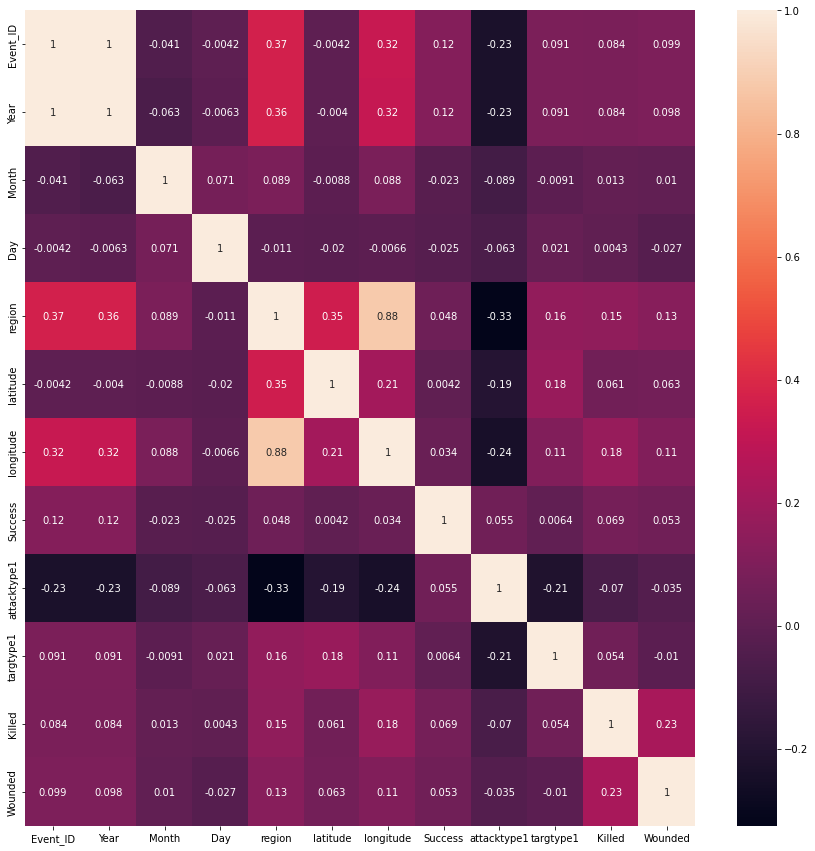

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(15,15))
sns.heatmap(data.corr(), annot =True)
plt.show()

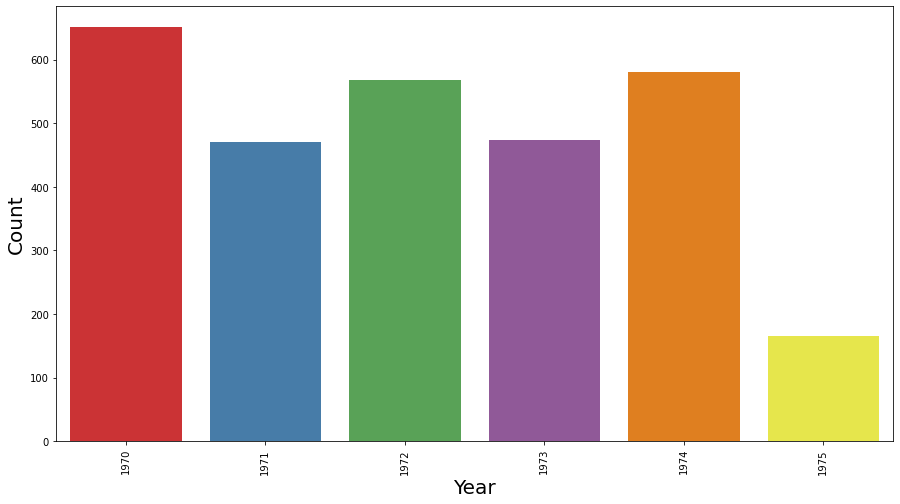

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data = data, x = 'Year',palette='Set1')
plt.xticks(rotation=90)
plt.xlabel("Year",size=20)
plt.ylabel("Count",size=20)
plt.show()

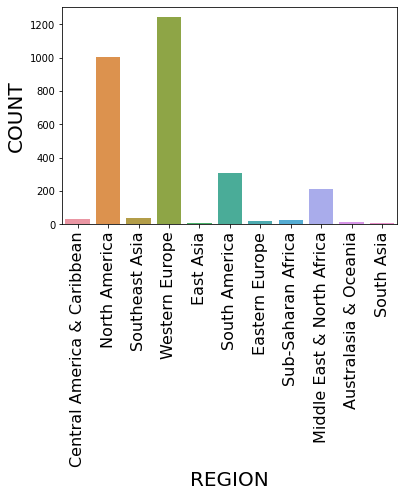

In [ ]:
sns.countplot(data = data, x='Region')
plt.xticks(size = 16,rotation=90)
plt.xlabel("REGION",size=20)
plt.ylabel("COUNT",size=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


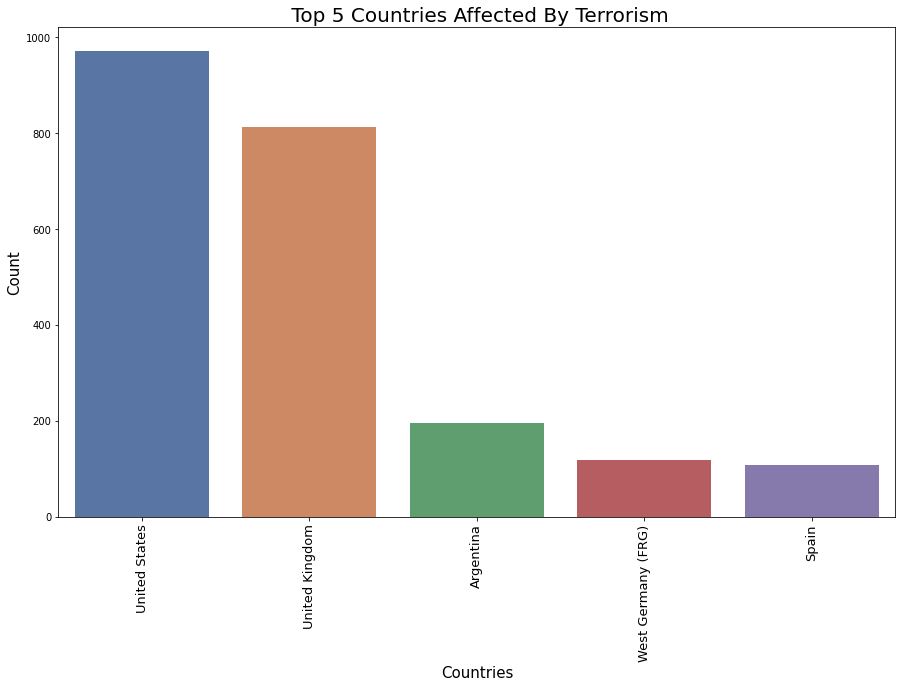

In [ ]:
plt.figure(figsize=(15,9))
x = data['Country'].value_counts().index[:5]
y = data['Country'].value_counts().values[:5]
sns.barplot(x,y,palette='deep')
plt.title(' Top 5 Countries Affected By Terrorism',size=20)
plt.xlabel('Countries',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=13,rotation= 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


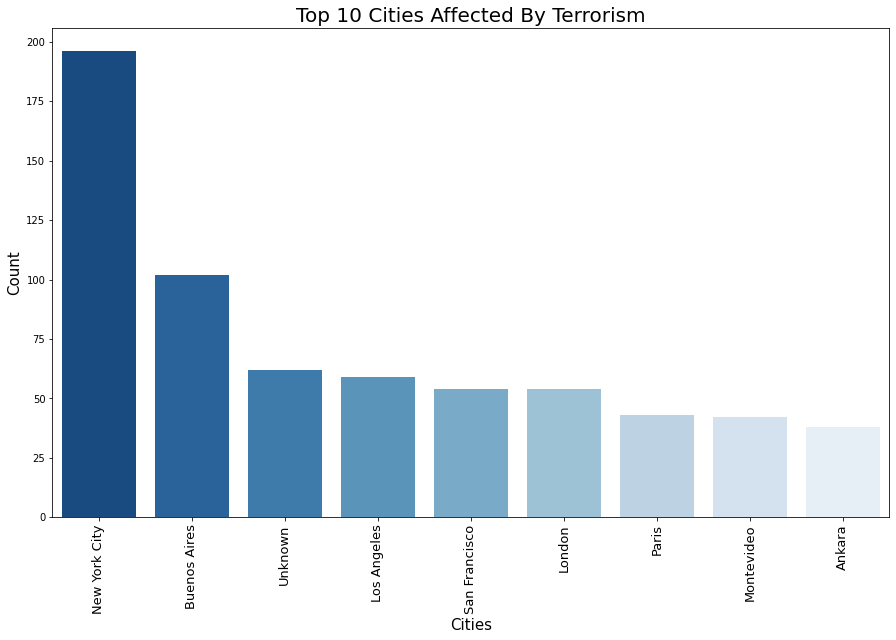

In [ ]:
plt.figure(figsize=(15,9))
x =data['city'].value_counts().index[1:10]
y =data['city'].value_counts().values[1:10]
sns.barplot(x,y,palette='Blues_r')
plt.title('Top 10 Cities Affected By Terrorism',size=20)
plt.xlabel('Cities',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=13,rotation= 90)
plt.show()

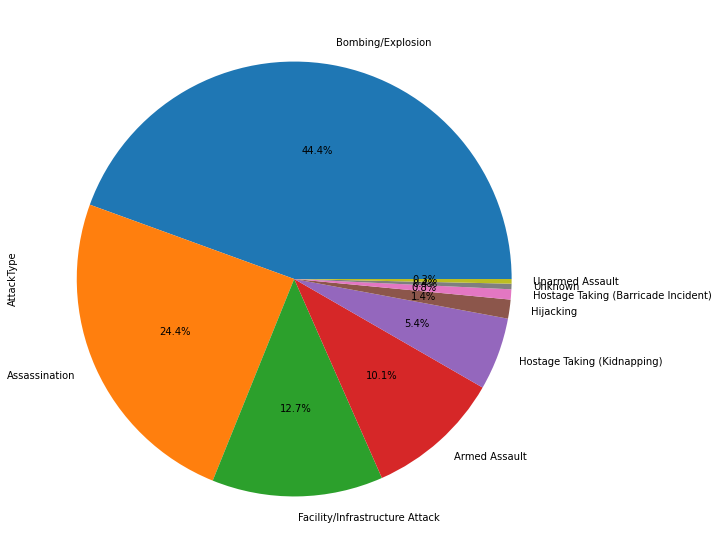

In [ ]:
plt.figure(figsize=(10,10))
data['AttackType'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

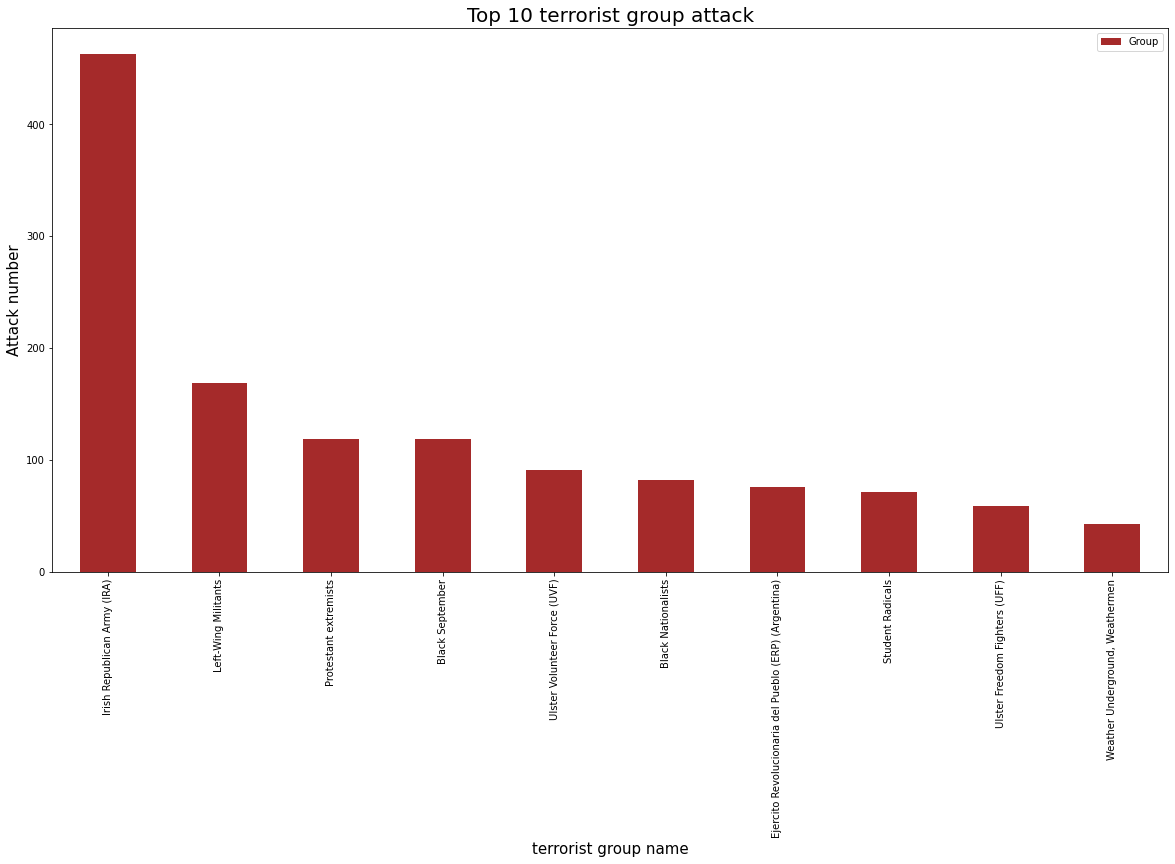

In [ ]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='brown',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

# Target type

In [ ]:
Target = data['Target_type'].value_counts().nlargest(n=15)
Target

Business                          662
Private Citizens & Property       517
Military                          490
Government (Diplomatic)           292
Police                            227
Government (General)              224
Educational Institution           119
Airports & Aircraft               104
Terrorists/Non-State Militia       55
Utilities                          53
Journalists & Media                44
Religious Figures/Institutions     30
NGO                                21
Transportation                     21
Telecommunication                  14
Name: Target_type, dtype: int64

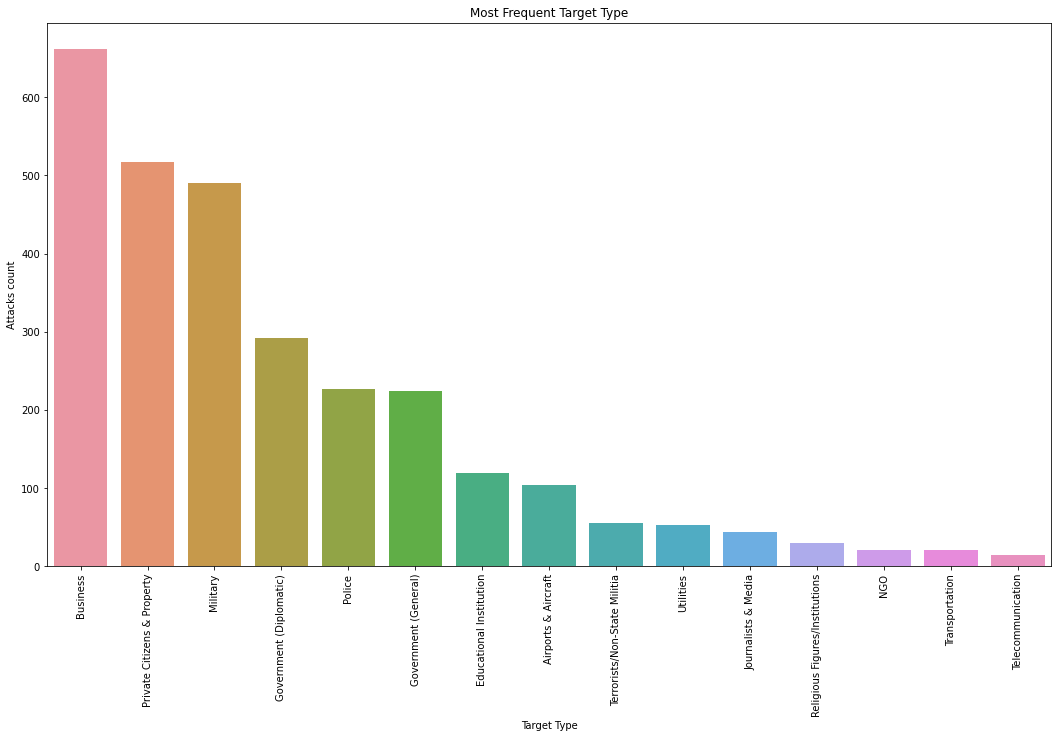

In [ ]:
plt.figure(figsize= (18,10))
sns.barplot(x = Target.index , y = Target.values)
plt.title('Most Frequent Target Type')
plt.xlabel('Target Type')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

# Thank you


---


